In [1]:
sc

<SparkContext master=local[*] appName=PySparkShell>

In [3]:
spark

In [4]:
from pyspark.sql.functions import *


In [5]:
#load user data
user_data = spark.read.csv("file:///home/hadoop/Downloads/users.txt", inferSchema = True, header = True)

#load followers data
follower_data = spark.read.csv("file:///home/hadoop/Downloads/followers.txt", inferSchema = True, header = True)

#### Setup Spark for Graph Frames

In [6]:
user_data.show()

+-------+------------+------------+
|user_id|   user_name|   full_name|
+-------+------------+------------+
|      1|amitmishra08| amit mishra|
|      2|    sharon_1|sharon dcruz|
|      3|   naveen007|naveen rajan|
|      4|   allen_456|  allen bose|
|      5|    siva2109|    siva rao|
|      6| bhagya10200|      bhagya|
|      7|  devika9091|   devika T.|
|      8|   anonymous|          NA|
+-------+------------+------------+



In [7]:
follower_data.show()

+-----------+-----------+
|follower_id|followee_id|
+-----------+-----------+
|          1|          2|
|          2|          3|
|          2|          4|
|          4|          2|
|          3|          1|
|          1|          4|
|          4|          7|
|          7|          8|
|          1|          6|
|          5|          6|
|          6|          5|
+-----------+-----------+



In [8]:
!pip install graphframes

Defaulting to user installation because normal site-packages is not writeable


In [9]:
from graphframes import GraphFrame

In [10]:
#Create vertices and edges of Graphframe
vertices = user_data.withColumnRenamed("user_id","id").select("id","user_name")

In [19]:
edges = follower_data.withColumnRenamed("follower_id","src").withColumnRenamed("followee_id","dst")\
.withColumnRenamed("frelationship","relationship")

In [20]:
#Create a graph - property Graph using vertices and edges
graph = GraphFrame(vertices, edges)

In [21]:
#Run pageRank algorithm from GraphX
ranks = graph.pageRank(resetProbability = 0.15, maxIter= 20)

In [22]:
ranks.vertices.orderBy(ranks.vertices.pagerank.desc()).show()

+---+------------+------------------+
| id|   user_name|          pagerank|
+---+------------+------------------+
|  2|    sharon_1|1.4200047973135044|
|  4|   allen_456| 1.371072199568242|
|  3|   naveen007| 1.371072199568242|
|  1|amitmishra08|0.7675701607100025|
|  6| bhagya10200|0.7675701607100025|
|  7|  devika9091|0.7675701607100025|
|  5|    siva2109|0.7675701607100025|
|  8|   anonymous|0.7675701607100025|
+---+------------+------------------+



In [16]:
graph.vertices.show()

+---+------------+
| id|   user_name|
+---+------------+
|  1|amitmishra08|
|  2|    sharon_1|
|  3|   naveen007|
|  4|   allen_456|
|  5|    siva2109|
|  6| bhagya10200|
|  7|  devika9091|
|  8|   anonymous|
+---+------------+



In [17]:
graph.edges.show()

+---+---+
|src|dst|
+---+---+
|  1|  2|
|  2|  3|
|  2|  4|
|  4|  2|
|  3|  1|
|  1|  4|
|  4|  7|
|  7|  8|
|  1|  6|
|  5|  6|
|  6|  5|
+---+---+



#### Create a Network Graph

In [23]:
!pip3 install networkx


Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 1.6 MB 1.9 MB/s            
  Attempting uninstall: decorator
    Found existing installation: decorator 5.1.1
    Uninstalling decorator-5.1.1:
      Successfully uninstalled decorator-5.1.1


In [24]:
import networkx as nx

In [28]:
nx_graph = nx.DiGraph()
edges_df = edges.toPandas()
for _, row in edges_df.iterrows():
    nx_graph.add_edge(row['src'],row['dst'])

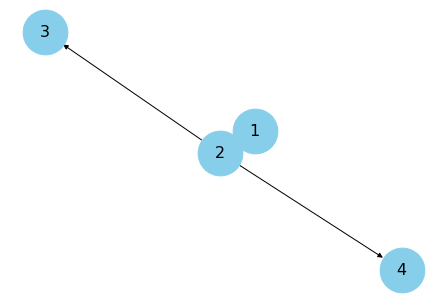

In [31]:
import matplotlib.pyplot as plt
pos = nx.spring_layout(nx_graph)
nx.draw(nx_graph, pos, with_labels =True , node_size = 2000, node_color = 'skyblue', font_size = 16, arrows =True)
plt.show()